Regression lineaire multiple avec Numpy
==

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

1.Dataset
==

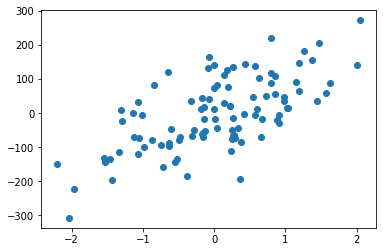

In [6]:
x,y=make_regression(n_samples=100,n_features=2, noise=10)
plt.scatter(x[:,0] ,y) #  afficher les resultat sous forme graphique x en abscisse et y en ordonnées

In [7]:
# verification des dimensions
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [8]:
#  redimensionner les dimensions
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [9]:
#  construction de la matrice X, incluant le biais
X=np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)
print(X[:10])

(100, 3)
[[-1.53909172 -0.35501302  1.        ]
 [ 1.15040085  0.09779058  1.        ]
 [-1.54191627 -0.08689991  1.        ]
 [ 0.79438306  0.59654871  1.        ]
 [-0.8705336  -0.09860601  1.        ]
 [-0.14263966 -0.20609611  1.        ]
 [ 0.04650112  1.01135296  1.        ]
 [ 0.25763427 -1.46302594  1.        ]
 [ 0.26374526  1.80874289  1.        ]
 [ 0.01037355 -0.19566809  1.        ]]


In [10]:
#  Initialisation du theta aléatoire
theta=np.random.randn(3,1)
theta

array([[0.80462391],
       [0.01941241],
       [1.78919284]])

2.Modèle linéaire
==

On implémente un modèle F=X . theta puis on teste le modèle

In [11]:
def model(X,theta):
    return X.dot(theta)

3.Fonction coût: Erreur quadratique moyenne
    ==

In [12]:
def cost_function(X,y,theta):
    m=len(y)
    return (1/(2*m))*np.sum((model(X,theta)-y)**2)

In [13]:
cost_function(X,y,theta)

5474.793068927787

4.Gradient et Descente de gradient
==

On implémente la formule du gradient pour le MSE

In [14]:
def grad(X,y,theta):
    m=len(y)
    return (1/m) * X.T.dot(model(X,theta)-y)

On utilise cette fonction dans la descente du Gradient

In [15]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta - (learning_rate * grad(X,y,theta)) #  mise a jour des paramètres theta (formule du gradient descends)
        cost_history[i] = cost_function(X,y,theta) #  on enregistre la valeur du cout autour de i dans cost_history
    return theta, cost_history
          

5.Phase d'entrainement
==

On définit un nombre d'itération ainsi qu'un pas d'apprentissage alpha, et c'est parti

Une fois le modèle entrainé, on observe les résultats par rapport à notre Dataset

In [16]:
n_iterations=1000
learning_rate=0.01

In [17]:
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)

In [18]:
 #  les paramètres du modèle une fois que celui ci a été entrainé
theta_final

array([[88.31831731],
       [70.84978812],
       [ 0.40418838]])

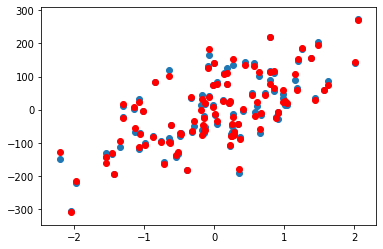

In [19]:
 #  creation d'un vecteur prediction qui contient les prédictions de notre modèle final
predictions=model(X,theta_final)
    
 #  Afficher les résultats de prédictions (en rouge) par rapport à notre Dataset (bleu)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],predictions,c='r')
    

6.Courbe d'apprentissage
==

On vérifie si vraiment l'algorithme à bien convergé

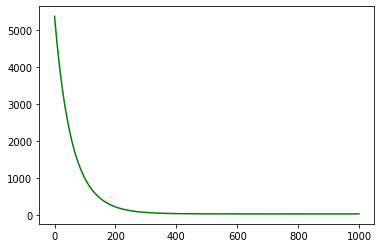

In [20]:
plt.plot(range(n_iterations),cost_history,c='green') 

On verifie la performance du modèle avec le coefficient du détermination

In [21]:
def coef_determination(y,pred):
    u=((y - pred)**2).sum()
    v=((y - y.mean())**2).sum()
    return 1 - (u/v)
coef_determination(y,predictions)

0.9928247727281296

#  Représentation du modèle en 3D 

<IPython.core.display.Javascript object>


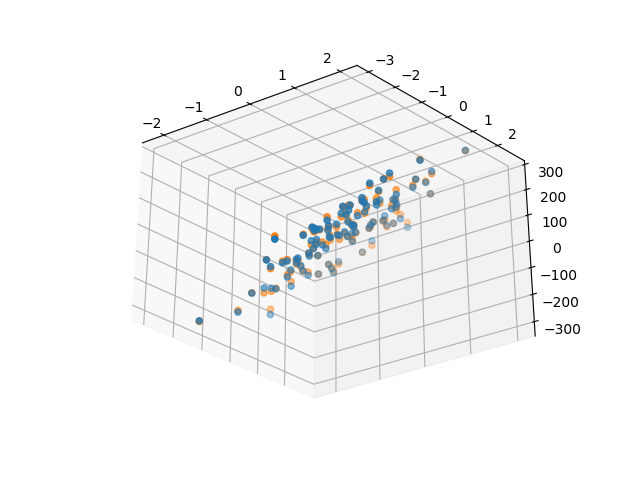

In [25]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(X[:,0],X[:,1],y)
ax.scatter(X[:,0],X[:,1],predictions)